In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /Users/harshitkumar/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [5]:
import pandas as pd 
import numpy as np

In [6]:
books = pd.read_csv(f"{path}/books.csv")

In [11]:
books.sample(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
368,9780060936662,0060936665,Smart Discipline(R),"Fast, Lasting Solutions for Your Child's Self-...",Larry Koenig,Family & Relationships,http://books.google.com/books/content?id=Bpo2r...,"Larry J. Koenig, Ph.D., creator of the hugely ...",2004.0,3.99,208.0,12.0
203,9780060586546,0060586540,Great Short Works of Herman Melville,NaN,Herman Melville,Fiction,http://books.google.com/books/content?id=6WgbD...,"Billy Budd, Sailor and Bartleby, the Scrivener...",2004.0,4.02,512.0,401.0


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [14]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.58159722222221, 0.5, 'Missing Values')

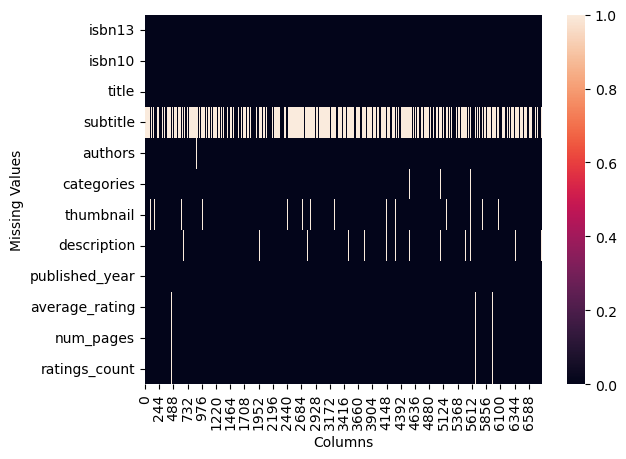

In [21]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")

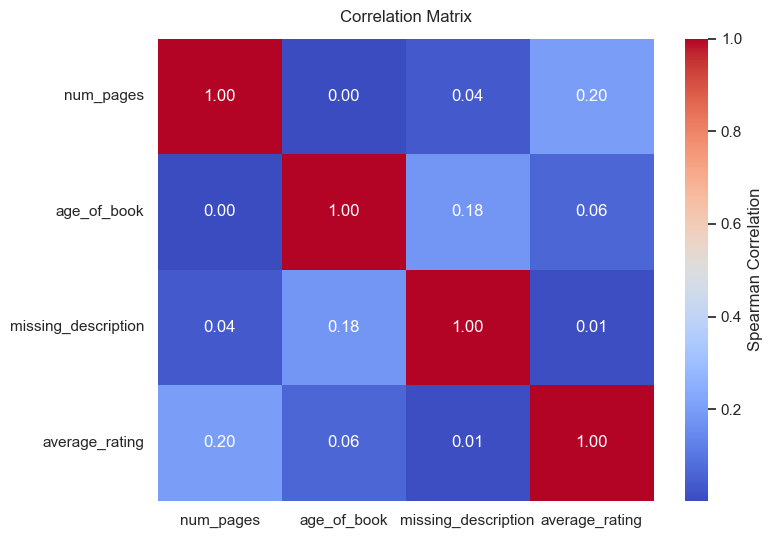

In [29]:
import numpy as np

books['missing_description'] = np.where(books['description'].isnull(), 1, 0)
books['age_of_book'] = 2024 - books['published_year']

interested_columns = ["num_pages","age_of_book","missing_description","average_rating"]

coorelation_matrix = books[interested_columns].corr()

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(coorelation_matrix, annot=True, cmap="coolwarm", fmt=".2f",cbar_kws = {'label':'Spearman Correlation'})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)
plt.show()

In [30]:
books.isnull().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4429
authors                  72
categories               99
thumbnail               329
description             262
published_year            6
average_rating           43
num_pages                43
ratings_count            43
missing_description       0
age_of_book               6
dtype: int64

In [37]:
books = books[~books["description"].isnull()&
      ~books["num_pages"].isnull()&
      ~books["average_rating"].isnull()&
      ~books["published_year"].isnull()
]

In [54]:
books['categories'].nunique()

531

<Axes: xlabel='count', ylabel='Count'>

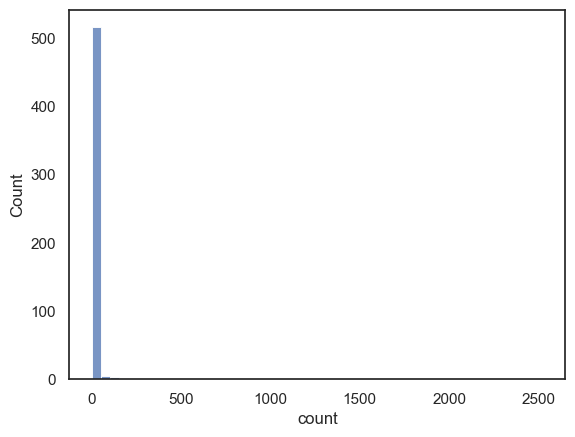

In [63]:
books['categories'].value_counts().reset_index().sort_values("count", ascending=False)
sns.histplot(books['categories'].value_counts(), bins=50)

In [64]:
books['words_in_description'] = books['description'].apply(lambda x: len(x.split()))

/var/folders/44/8qf5tgj558v7tbx0cl8zhcxh0000gn/T/ipykernel_44413/2411603443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['words_in_description'] = books['description'].apply(lambda x: len(x.split()))


/var/folders/44/8qf5tgj558v7tbx0cl8zhcxh0000gn/T/ipykernel_44413/2724141805.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


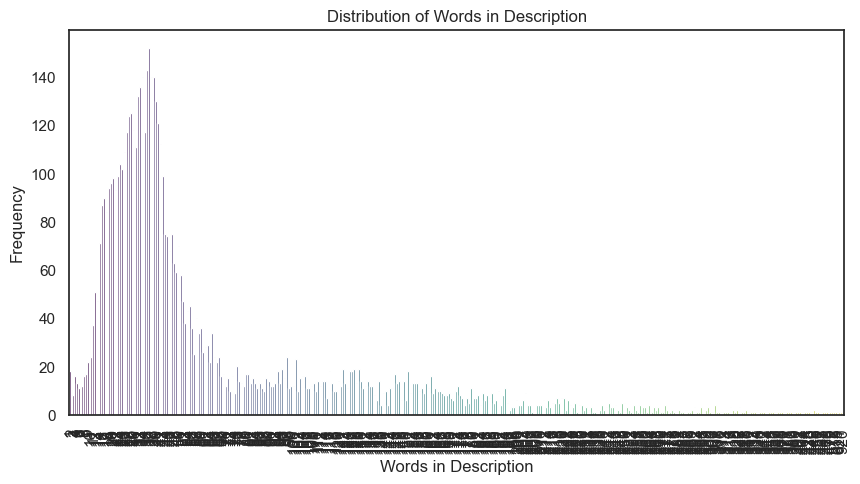

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = books['words_in_description'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

plt.xlabel('Words in Description')
plt.ylabel('Frequency')
plt.title('Distribution of Words in Description')
plt.xticks(rotation=90)  

plt.show()

In [84]:
books_missing_24_words = books.loc[books['words_in_description']>=24]

In [89]:
books_missing_24_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75


In [93]:
books_missing_24_words["title_and_subtitle"] = np.where(
    books_missing_24_words["subtitle"].isna(),
    books_missing_24_words["title"],
    books_missing_24_words["title"] + ": " + books_missing_24_words["subtitle"]
)

/var/folders/44/8qf5tgj558v7tbx0cl8zhcxh0000gn/T/ipykernel_44413/1094164513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_24_words["title_and_subtitle"] = np.where(


In [94]:
books_missing_24_words["tagged_description"] = books_missing_24_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)

/var/folders/44/8qf5tgj558v7tbx0cl8zhcxh0000gn/T/ipykernel_44413/4051171819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_24_words["tagged_description"] = books_missing_24_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)


In [96]:
(
    books_missing_24_words
    .drop(["subtitle","missing_description","age_of_book","words_in_description"],axis=1)
    .to_csv("books_cleaned.csv",index=False)
)

In [108]:
df = pd.read_csv("books_cleaned.csv")
df.isnull().sum()

isbn13                  0
isbn10                  0
title                   0
authors                34
categories             30
thumbnail             168
description             0
published_year          0
average_rating          0
num_pages               0
ratings_count           0
title_and_subtitle      0
tagged_description      0
dtype: int64